<a href="https://colab.research.google.com/github/Mounikabodepu/mounika_bodepu/blob/main/ML_PD_MODEL(CREDIT_DEFAULT)_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

In [8]:
loan_data_backup=pd.read_csv('/content/Loan_default.csv')


In [9]:
loan_data = loan_data_backup.copy()
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Location,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
loan_data.replace('nan','')
loan_data['Gender'] = loan_data['Gender'].fillna('')

In [11]:
#displays all columns names.
loan_data.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Location',
       'Loan_Status'], dtype=object)

In [12]:
#displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()
loan_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          610 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Location           614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
#CLEANING THE DATA - Dealing with missing values


loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,4
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [14]:
# 1st variable - Gender

loan_data['Gender'].unique()
loan_data['Gender'] = loan_data['Gender'].str.replace('nan','')
loan_data['Gender'] = loan_data['Gender'].replace('nan','')


In [15]:
Gender_map = {'Male': 1, 'Female': 0}
loan_data['Gender1'] = loan_data['Gender'].map(Gender_map)
a = loan_data['Gender1'].mode()
a


,Gender1
0,1.0


In [16]:
loan_data['Gender1'] = loan_data['Gender1'].replace(np.nan, 1)

In [17]:
loan_data.info()
loan_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          610 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Location           614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Gender1            614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,4
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [18]:
#2nd variable - married

loan_data['Married'].unique()
Married_map = {'Yes': 1, 'No': 0}

In [19]:
loan_data['Married1'] = loan_data['Married'].map(Married_map)
a = loan_data['Married1'].mode()
a

,Married1
0,1.0


In [20]:
loan_data['Married1'] = loan_data['Married1'].replace(np.nan, 1)

In [21]:
#3rd variable - dependents


loan_data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [22]:
Dependents_map = {'0': 0, '1': 1, '2': 2, '3+': 3}

In [23]:
loan_data['Dependents1'] = loan_data['Dependents'].map(Dependents_map)
a = loan_data['Dependents1'].mode()
a

,Dependents1
0,0.0


In [24]:
loan_data['Dependents1'] = loan_data['Dependents1'].replace(np.nan, 0)

In [25]:
# 4th variable - Education


loan_data['Education'].unique()

array(['Graduate', 'Not Graduate', nan], dtype=object)

In [26]:
Education_map = {'Graduate': 1, 'Non Graduate': 0}

In [27]:
loan_data['Education1'] = loan_data['Education'].map(Education_map)
a = loan_data['Education1'].mode()
a

,Education1
0,1.0


In [28]:
loan_data['Education1'] = loan_data['Education1'].replace(np.nan, 1)

In [29]:
# 5th Variable - Self Employed

loan_data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [30]:
Self_Employed_map = {'Yes':1, 'No':0}
loan_data['Self_Employed1'] = loan_data['Self_Employed'].map(Self_Employed_map)
a = loan_data['Self_Employed1'].mode()
a

,Self_Employed1
0,0.0


In [31]:
loan_data['Self_Employed1'] = loan_data['Self_Employed1'].replace(np.nan, 0)

In [32]:
# 6th Variable - LoanAmount

loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)

<ipython-input-32-96e229d49e4d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)


In [33]:
#7th Variable - Loan_Amount_Term

loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean(), inplace=True)
loan_data.isnull().sum()

<ipython-input-33-ab926e9a017c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean(), inplace=True)


,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,4
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [34]:
#8th Variable - Credit_History

loan_data['Credit_History'].fillna(0, inplace=True)
loan_data.isnull().sum()

<ipython-input-34-738d6df6ce4c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Credit_History'].fillna(0, inplace=True)


,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,4
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [35]:
#We will now delete the old variables

loan_data.drop('Gender', axis=1, inplace = True)
loan_data.drop('Education', axis=1, inplace = True)
loan_data.drop('Married', axis=1, inplace = True)
loan_data.drop('Dependents', axis=1, inplace = True)
loan_data.drop('Self_Employed', axis=1, inplace = True)

In [36]:
#Rename Gender1 to Gender
#changing cols with rename()

loan_data1 = loan_data.rename(columns = {"Gender1": "Gender",
                                         "Education1": "Education",
                                         "Married1": "Married",
                                         "Dependents1": "Dependents",
                                         "Self_Employed1": "Self_Employed"})

In [37]:
loan_data1.isnull().sum()

,0
Loan_ID,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Location,0
Loan_Status,0
Gender,0
Married,0


In [38]:
# DISCRETE VARIABLES

# Displays column names, complete (non-missing) cases per column, and datatype per column

loan_data1.info()
loan_data1['Loan_Amount_Term'].unique()
loan_data1['Loan_Amount_Term'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Location           614 non-null    object 
 7   Loan_Status        614 non-null    object 
 8   Gender             614 non-null    float64
 9   Married            614 non-null    float64
 10  Dependents         614 non-null    float64
 11  Education          614 non-null    float64
 12  Self_Employed      614 non-null    float64
dtypes: float64(9), int64(1), object(3)
memory usage: 62.5+ KB


342.0

In [39]:
#1st discrete variable: GRADE
# Create dummy variables from a variable


# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.
loan_data_dummies1 = [pd.get_dummies(loan_data1['Gender'], prefix = 'Gender', prefix_sep = ':'),
                      pd.get_dummies(loan_data1['Married'], prefix = 'Married', prefix_sep = ':'),
                      pd.get_dummies(loan_data1['Dependents'], prefix = 'Dependents', prefix_sep = ':'),
                      pd.get_dummies(loan_data1['Education'], prefix = 'Education', prefix_sep = ':'),
                      pd.get_dummies(loan_data1['Self_Employed'], prefix = 'Self_Employed', prefix_sep = ':'),
                      pd.get_dummies(loan_data1['Credit_History'], prefix = 'Credit_History', prefix_sep = ':'),
                      pd.get_dummies(loan_data1['Location'], prefix = 'Location', prefix_sep = ':'),
                      pd.get_dummies(loan_data1['Loan_Amount_Term'], prefix = 'Loan_Amount_Term', prefix_sep = ':')]


In [40]:
#We concatenate the dummy variables and this turns them into a dataframe.
loan_data_dummies1 = pd.concat(loan_data_dummies1, axis = 1)

In [41]:
loan_data_dummies1.head()

,Gender:0.0,Gender:1.0,Married:0.0,Married:1.0,Dependents:0.0,Dependents:1.0,Dependents:2.0,Dependents:3.0,Education:1.0,Self_Employed:0.0,...,Loan_Amount_Term:36.0,Loan_Amount_Term:60.0,Loan_Amount_Term:84.0,Loan_Amount_Term:120.0,Loan_Amount_Term:180.0,Loan_Amount_Term:240.0,Loan_Amount_Term:300.0,Loan_Amount_Term:342.0,Loan_Amount_Term:360.0,Loan_Amount_Term:480.0
0,False,True,True,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False
1,False,True,False,True,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False
4,False,True,True,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False


In [42]:
#Returns the type of the variable.
type(loan_data_dummies1)

pandas.core.frame.DataFrame

In [43]:
# Concatenates two dataframes.
# Here we concatenate the dataframe with the original data with the dataframe with dummy variables, along the columns.

loan_data1 = pd.concat([loan_data1, loan_data_dummies1], axis = 1)

In [44]:
# Displays all column names.
loan_data1.columns.values

array(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Location', 'Loan_Status',
       'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Gender:0.0', 'Gender:1.0', 'Married:0.0', 'Married:1.0',
       'Dependents:0.0', 'Dependents:1.0', 'Dependents:2.0',
       'Dependents:3.0', 'Education:1.0', 'Self_Employed:0.0',
       'Self_Employed:1.0', 'Credit_History:0.0', 'Credit_History:1.0',
       'Location:Rural', 'Location:Semiurban', 'Location:Urban',
       'Loan_Amount_Term:12.0', 'Loan_Amount_Term:36.0',
       'Loan_Amount_Term:60.0', 'Loan_Amount_Term:84.0',
       'Loan_Amount_Term:120.0', 'Loan_Amount_Term:180.0',
       'Loan_Amount_Term:240.0', 'Loan_Amount_Term:300.0',
       'Loan_Amount_Term:342.0', 'Loan_Amount_Term:360.0',
       'Loan_Amount_Term:480.0'], dtype=object)

In [45]:
# Good/Bad definition
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.
Loan_Status_map = {'Y': 1, 'N': 0}

In [46]:
loan_data1['target'] = loan_data1['Loan_Status'].map(Loan_Status_map)

In [47]:

loan_data1['target'].unique()

array([1, 0])

In [48]:
loan_data1['target'].value_counts()

,count
target,
1,422
0,192


In [49]:
loan_data1.drop('Loan_Status', axis=1, inplace = True)

In [50]:
loan_data1['Location'].unique()
Location_map = {'Urban': 2, 'Semiurban': 1, 'Rural': 0}

In [51]:
loan_data1['Location1'] = loan_data1['Location'].map(Location_map)
loan_data.drop('Location', axis=1, inplace = True)


In [52]:
loan_data1 = loan_data1.rename(columns = {"Location1": "Location"})
loan_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   ApplicantIncome         614 non-null    int64  
 2   CoapplicantIncome       614 non-null    float64
 3   LoanAmount              614 non-null    float64
 4   Loan_Amount_Term        614 non-null    float64
 5   Credit_History          614 non-null    float64
 6   Location                614 non-null    object 
 7   Gender                  614 non-null    float64
 8   Married                 614 non-null    float64
 9   Dependents              614 non-null    float64
 10  Education               614 non-null    float64
 11  Self_Employed           614 non-null    float64
 12  Gender:0.0              614 non-null    bool   
 13  Gender:1.0              614 non-null    bool   
 14  Married:0.0             614 non-null    bo

In [53]:
# Dropping the original variables for which we have dummies now
loan_data1.drop('Gender', axis=1, inplace = True)
loan_data1.drop('Education', axis=1, inplace = True)
loan_data1.drop('Married', axis=1, inplace = True)
loan_data1.drop('Dependents', axis=1, inplace = True)
loan_data1.drop('Self_Employed', axis=1, inplace = True)
loan_data1.drop('Loan_Amount_Term', axis=1, inplace = True)
loan_data1.drop('Location', axis=1, inplace = True)
loan_data1.drop('Credit_History', axis=1, inplace = True)
#loan_data1.drop('Self_Employed', axis=1, inplace = True)
loan_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   ApplicantIncome         614 non-null    int64  
 2   CoapplicantIncome       614 non-null    float64
 3   LoanAmount              614 non-null    float64
 4   Gender:0.0              614 non-null    bool   
 5   Gender:1.0              614 non-null    bool   
 6   Married:0.0             614 non-null    bool   
 7   Married:1.0             614 non-null    bool   
 8   Dependents:0.0          614 non-null    bool   
 9   Dependents:1.0          614 non-null    bool   
 10  Dependents:2.0          614 non-null    bool   
 11  Dependents:3.0          614 non-null    bool   
 12  Education:1.0           614 non-null    bool   
 13  Self_Employed:0.0       614 non-null    bool   
 14  Self_Employed:1.0       614 non-null    bo

In [54]:
#Dropping the reference variables now for discrete variables
loan_data1.drop('Gender:0.0', axis=1, inplace = True)
#loan_data1.drop('Education:0.0', axis=1, inplace = True)
loan_data1.drop('Married:0.0', axis=1, inplace = True)
loan_data1.drop('Dependents:0.0', axis=1, inplace = True)
loan_data1.drop('Self_Employed:0.0', axis=1, inplace = True)
loan_data1.drop('Credit_History:0.0', axis=1, inplace = True)
loan_data1.drop('Location:Rural', axis=1, inplace = True)
#loan_data1.drop('Gender', axis=1, inplace = True)

In [55]:
#Dropping Loan_ID variable as well
loan_data1.drop('Loan_ID', axis=1, inplace = True)

In [56]:
loan_data1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender:1.0,Married:1.0,Dependents:1.0,Dependents:2.0,Dependents:3.0,Education:1.0,Self_Employed:1.0,...,Loan_Amount_Term:60.0,Loan_Amount_Term:84.0,Loan_Amount_Term:120.0,Loan_Amount_Term:180.0,Loan_Amount_Term:240.0,Loan_Amount_Term:300.0,Loan_Amount_Term:342.0,Loan_Amount_Term:360.0,Loan_Amount_Term:480.0,target
0,5849,0.0,146.412162,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1
1,4583,1508.0,128.000000,True,True,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,0
2,3000,0.0,66.000000,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,1
3,2583,2358.0,120.000000,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1
4,6000,0.0,141.000000,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1


In [57]:
#Splitting the data

from sklearn.model_selection import train_test_split

#We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
#The time we split the size of the test dataset to be 30%.
# Respectively, the size of the train dataset becomes 70%.
# We also set a specific random state
# This would allow us to perform the exact same split multiple times.
# This means, to assign the exact same observations to the train and test datasets.

loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data1.drop('target', axis = 1), loan_data1['target'], test_size = 0.3, random_state = 42)


In [58]:
loan_data_inputs_train.shape


(429, 24)

In [59]:
loan_data_targets_train.shape

(429,)

In [60]:
loan_data_inputs_test.shape

(185, 24)

In [61]:
loan_data_targets_test.shape

(185,)

In [62]:
loan_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ApplicantIncome         614 non-null    int64  
 1   CoapplicantIncome       614 non-null    float64
 2   LoanAmount              614 non-null    float64
 3   Gender:1.0              614 non-null    bool   
 4   Married:1.0             614 non-null    bool   
 5   Dependents:1.0          614 non-null    bool   
 6   Dependents:2.0          614 non-null    bool   
 7   Dependents:3.0          614 non-null    bool   
 8   Education:1.0           614 non-null    bool   
 9   Self_Employed:1.0       614 non-null    bool   
 10  Credit_History:1.0      614 non-null    bool   
 11  Location:Semiurban      614 non-null    bool   
 12  Location:Urban          614 non-null    bool   
 13  Loan_Amount_Term:12.0   614 non-null    bool   
 14  Loan_Amount_Term:36.0   614 non-null    bo

In [63]:
#Dataa preparation

df_inputs_test = loan_data_inputs_test

df_inputs_prepr = loan_data_inputs_train

In [64]:

df_targets_prepr = loan_data_targets_train

In [65]:
#Computing Information Value for GRADE Variable
# Displays unique values of a column.
df_inputs_prepr['Gender:1.0'].unique()

array([ True, False])

In [66]:
#Concatenates two dataframes along the columns.
df1 = pd.concat([df_inputs_prepr['Gender:1.0'], df_targets_prepr], axis = 1)
df1.head()

,Gender:1.0,target
553,True,0
601,True,1
261,True,1
496,True,1
529,True,1


In [67]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,Gender:1.0,target
0,False,84
1,True,345


In [68]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,Gender:1.0,target
0,False,0.714286
1,True,0.701449


In [69]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
df1


,Gender:1.0,target,Gender:1.0,target
0,False,84,False,0.714286
1,True,345,True,0.701449


In [70]:
df1 = df1.iloc[:, [0, 1, 3]]
df1

,Gender:1.0,target,target
0,False,84,0.714286
1,True,345,0.701449


In [71]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,Gender:1.0,n_obs,prop_good
0,False,84,0.714286
1,True,345,0.701449


In [72]:
# We divide the values of one column by the values of another column and save the result in a new variable.
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
df1


,Gender:1.0,n_obs,prop_good,prop_n_obs
0,False,84,0.714286,0.195804
1,True,345,0.701449,0.804196


In [73]:
# We multiply the values of one column by the values of another column and save the result in a new variable.
df1['n_good'] = df1['prop_good']*df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good'])*df1['n_obs']
df1

,Gender:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,False,84,0.714286,0.195804,60.0,24.0
1,True,345,0.701449,0.804196,242.0,103.0


In [74]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1


,Gender:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,False,84,0.714286,0.195804,60.0,24.0,0.198675,0.188976
1,True,345,0.701449,0.804196,242.0,103.0,0.801325,0.811024


In [75]:
# We take the natural logarithms of a variable and save the result in a new variable.
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,Gender:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,False,84,0.714286,0.195804,60.0,24.0,0.198675,0.188976,0.050051
1,True,345,0.701449,0.804196,242.0,103.0,0.801325,0.811024,-0.012031


In [76]:
df1 = df1.sort_values(['WoE'])

In [77]:
df1 = df1.reset_index(drop = True)
df1

,Gender:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,True,345,0.701449,0.804196,242.0,103.0,0.801325,0.811024,-0.012031
1,False,84,0.714286,0.195804,60.0,24.0,0.198675,0.188976,0.050051


In [78]:
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_prop_good'] = df1['prop_good'].diff().abs()

In [79]:
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,Gender:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,True,345,0.701449,0.804196,242.0,103.0,0.801325,0.811024,-0.012031,NaN,NaN
1,False,84,0.714286,0.195804,60.0,24.0,0.198675,0.188976,0.050051,0.012836,0.062082


In [80]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad'])*df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

# This gives the IV for Gender:1.0 Variable: 0.602922

,Gender:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,True,345,0.701449,0.804196,242.0,103.0,0.801325,0.811024,-0.012031,NaN,NaN,0.000602
1,False,84,0.714286,0.195804,60.0,24.0,0.198675,0.188976,0.050051,0.012836,0.062082,0.000602


In [81]:
# Creating a function to automate the above process of computing information value

# WoE function for discrete unordered variables
# Here we combine all of the operations above in a function.

def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1 - df['prop_good'])*df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [82]:
# The function takes 3 arguments: a dataframe, a string, and a dataframe.
#The function returns a dataframe as a result.
df_inputs_prepr.columns.values
df_temp = woe_discrete(df_inputs_prepr, 'Gender:1.0', df_targets_prepr)
df_temp

,Gender:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,True,345,0.701449,0.804196,242.0,103.0,0.801325,0.811024,-0.012031,NaN,NaN,0.000602
1,False,84,0.714286,0.195804,60.0,24.0,0.198675,0.188976,0.050051,0.012836,0.062082,0.000602


In [83]:
df_temp = woe_discrete(df_inputs_prepr, 'Married:1.0', df_targets_prepr)
df_temp

,Married:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,False,161,0.645963,0.375291,104.0,57.0,0.344371,0.448819,-0.264900,NaN,NaN,0.045793
1,True,268,0.738806,0.624709,198.0,70.0,0.655629,0.551181,0.173532,0.092843,0.438432,0.045793


In [84]:
df_temp = woe_discrete(df_inputs_prepr, 'Dependents:1.0', df_targets_prepr)
df_temp

,Dependents:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,True,72,0.638889,0.167832,46.0,26.0,0.152318,0.204724,-0.295695,NaN,NaN,0.018841
1,False,357,0.717087,0.832168,256.0,101.0,0.847682,0.795276,0.063817,0.078198,0.359512,0.018841


In [85]:

df_temp = woe_discrete(df_inputs_prepr, 'Dependents:2.0', df_targets_prepr)
df_temp

,Dependents:2.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,False,364,0.692308,0.848485,252.0,112.0,0.834437,0.88189,-0.055310,NaN,NaN,0.018651
1,True,65,0.769231,0.151515,50.0,15.0,0.165563,0.11811,0.337733,0.076923,0.393043,0.018651


In [86]:
df_temp = woe_discrete(df_inputs_prepr, 'Dependents:3.0', df_targets_prepr)
df_temp

,Dependents:3.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,False,394,0.697970,0.918415,275.0,119.0,0.910596,0.937008,-0.028592,NaN,NaN,0.010003
1,True,35,0.771429,0.081585,27.0,8.0,0.089404,0.062992,0.350155,0.073459,0.378748,0.010003


In [87]:

df_temp = woe_discrete(df_inputs_prepr, 'Education:1.0', df_targets_prepr)
df_temp

,Education:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,True,429,0.703963,1.0,302.0,127.0,1.0,1.0,0.0,NaN,NaN,0.0


In [88]:
df_temp = woe_discrete(df_inputs_prepr, 'Self_Employed:1.0', df_targets_prepr)
df_temp

,Self_Employed:1.0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,True,59,0.694915,0.137529,41.0,18.0,0.135762,0.141732,-0.043040,NaN,NaN,0.000298
1,False,370,0.705405,0.862471,261.0,109.0,0.864238,0.858268,0.006933,0.01049,0.049972,0.000298


In [89]:
# Visualizing results

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

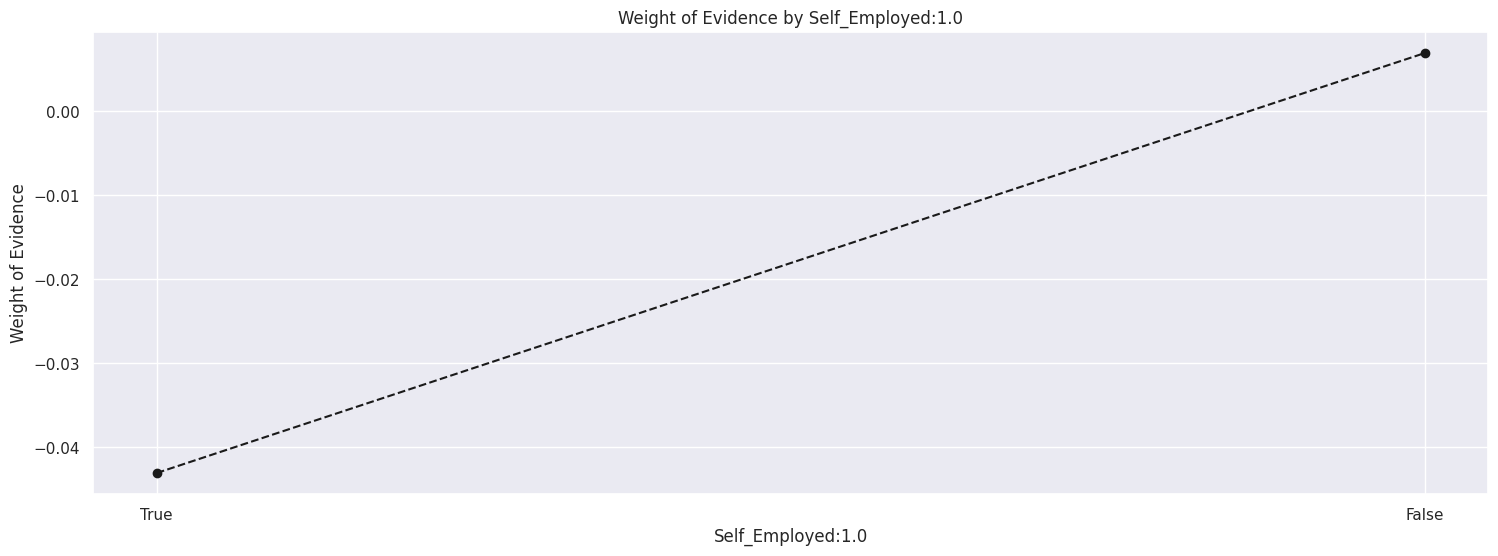

In [90]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.


def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))

    # Turns the values of the column with the index 0 to strings, makes an array from these strings, and passes it to variable x.

    y = df_WoE['WoE']

    # Selects a column with label 'WoE' and passes it to variable y.

    plt.figure(figsize=(18, 6))

    # Sets the graph size to width 18 x height 6.

    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')

    # Plots the datapoints with coordinates variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and color to black.

    plt.xlabel(df_WoE.columns[0])

    # Names the x-axis with the name of the column with index 0.

    plt.ylabel('Weight of Evidence')

    # Names the y-axis 'Weight of Evidence'.

    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))

    # Names the graph 'Weight of Evidence by ' the name of the column with index 0.

    plt.xticks(rotation = rotation_of_x_axis_labels)

    # Rotates the labels of the x-axis a predefined number of degrees.

plot_by_woe(df_temp)

In [91]:

# Computing IV for continuous variables
# CONTINUOUS VARIABLES
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1 - df['prop_good'])*df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [92]:
df_inputs_prepr.columns.values

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender:1.0',
       'Married:1.0', 'Dependents:1.0', 'Dependents:2.0',
       'Dependents:3.0', 'Education:1.0', 'Self_Employed:1.0',
       'Credit_History:1.0', 'Location:Semiurban', 'Location:Urban',
       'Loan_Amount_Term:12.0', 'Loan_Amount_Term:36.0',
       'Loan_Amount_Term:60.0', 'Loan_Amount_Term:84.0',
       'Loan_Amount_Term:120.0', 'Loan_Amount_Term:180.0',
       'Loan_Amount_Term:240.0', 'Loan_Amount_Term:300.0',
       'Loan_Amount_Term:342.0', 'Loan_Amount_Term:360.0',
       'Loan_Amount_Term:480.0'], dtype=object)

In [93]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'ApplicantIncome', df_targets_prepr)
df_temp

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ApplicantIncome,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,150,1,0.0,0.002331,0.0,1.0,0.000000,0.007874,-inf,NaN,NaN,inf
1,645,1,1.0,0.002331,1.0,0.0,0.003311,0.000000,inf,1.0,inf,inf
2,1025,2,1.0,0.004662,2.0,0.0,0.006623,0.000000,inf,0.0,NaN,inf
3,1299,1,1.0,0.002331,1.0,0.0,0.003311,0.000000,inf,0.0,NaN,inf
4,1442,1,0.0,0.002331,0.0,1.0,0.000000,0.007874,-inf,1.0,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
369,23803,1,1.0,0.002331,1.0,0.0,0.003311,0.000000,inf,0.0,NaN,inf
370,33846,1,0.0,0.002331,0.0,1.0,0.000000,0.007874,-inf,1.0,inf,inf
371,39147,1,1.0,0.002331,1.0,0.0,0.003311,0.000000,inf,1.0,inf,inf
372,51763,1,1.0,0.002331,1.0,0.0,0.003311,0.000000,inf,0.0,NaN,inf


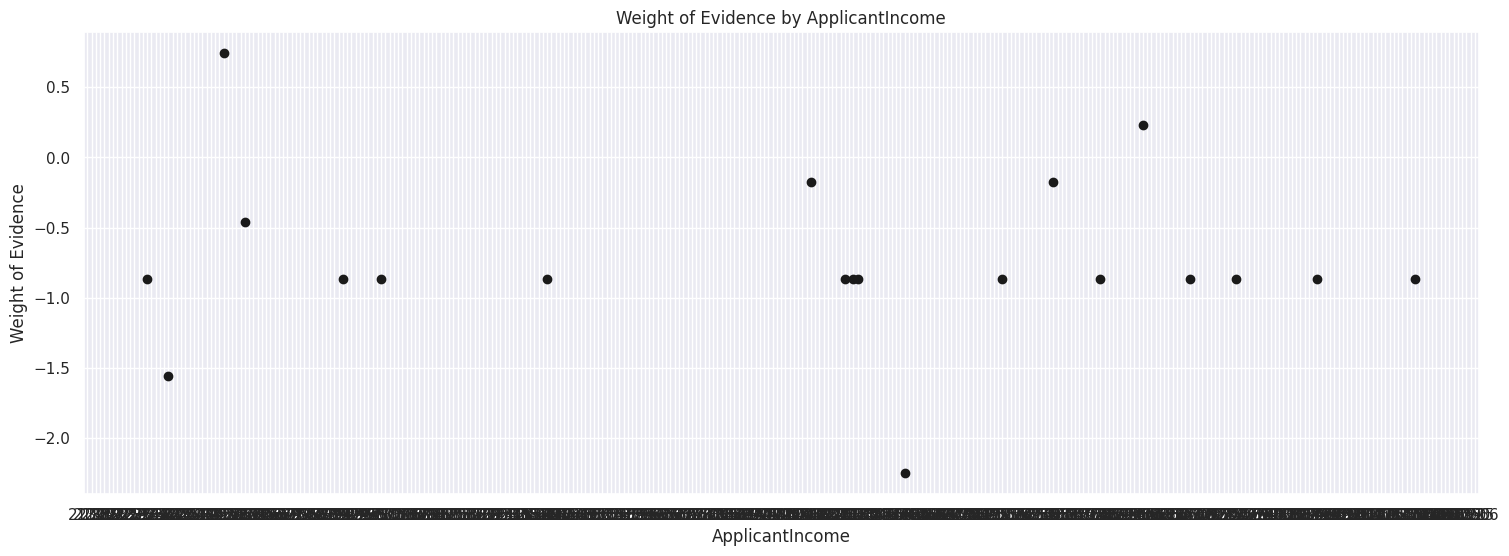

In [94]:
plot_by_woe(df_temp)

In [95]:
# We plot the weight of evidence values.
#1st variable - Applicant Income
df_inputs_prepr['ApplicantIncome']
df_inputs_prepr['ApplicantIncome_factor'] = pd.cut(df_inputs_prepr['ApplicantIncome'], 50)

In [96]:
#50 bins were not making any sense
df_inputs_prepr['ApplicantIncome_factor'] = pd.cut(df_inputs_prepr['ApplicantIncome'], 10)

In [97]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['ApplicantIncome_factor'] = pd.cut(df_inputs_prepr['ApplicantIncome'], 5)

In [98]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'ApplicantIncome_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

<ipython-input-91-d10a1eb710e7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
<ipython-input-91-d10a1eb710e7>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ApplicantIncome_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(69.15, 16320.0]",414,0.702899,0.965035,291.0,123.0,0.963576,0.968504,-0.005101,NaN,NaN,inf
1,"(16320.0, 32490.0]",11,0.818182,0.025641,9.0,2.0,0.029801,0.015748,0.637837,0.115283,0.642938,inf
2,"(32490.0, 48660.0]",2,0.500000,0.004662,1.0,1.0,0.003311,0.007874,-0.866240,0.318182,1.504077,inf
3,"(48660.0, 64830.0]",1,1.000000,0.002331,1.0,0.0,0.003311,0.000000,inf,0.500000,inf,inf
4,"(64830.0, 81000.0]",1,0.000000,0.002331,0.0,1.0,0.000000,0.007874,-inf,1.000000,inf,inf


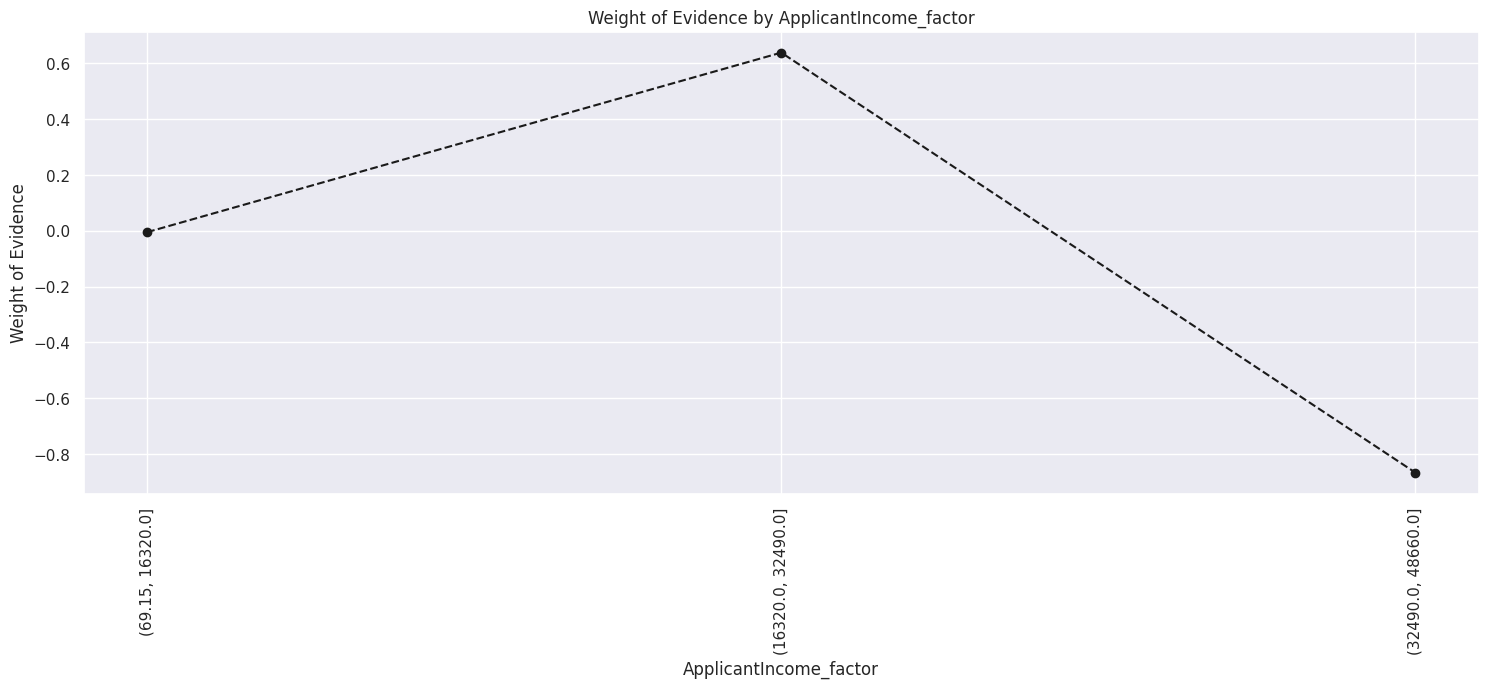

In [99]:
plot_by_woe(df_temp, 90)

In [100]:
#based on no.of observations we have, we are further dividing them and encoding the continuous variables
#this process is called coarse classing

#cutting the continuous variables to form bins is called fine-classing but this process of dividing them and encoding them using
#an external factor like no.of obs or woe is coarse classing

df_inputs_prepr['ApplicantIncome:<16320'] = np.where((df_inputs_prepr['ApplicantIncome'] <= 16320), 1, 0)
df_inputs_prepr['ApplicantIncome:16320-32490'] = np.where((df_inputs_prepr['ApplicantIncome'] > 16320) & (df_inputs_prepr['ApplicantIncome'] <= 32490), 1, 0)
df_inputs_prepr['ApplicantIncome:>32490'] = np.where((df_inputs_prepr['ApplicantIncome'] > 32490), 1, 0)

In [101]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'ApplicantIncome:<16320', df_targets_prepr)
df_temp

,ApplicantIncome:<16320,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,15,0.733333,0.034965,11.0,4.0,0.036424,0.031496,0.145361,NaN,NaN,0.000741
1,1,414,0.702899,0.965035,291.0,123.0,0.963576,0.968504,-0.005101,0.030435,0.150462,0.000741


In [102]:
#2nd variable - Coapplicant Income

df_inputs_prepr['CoapplicantIncome']
df_inputs_prepr['CoapplicantIncome_factor'] = pd.cut(df_inputs_prepr['CoapplicantIncome'], 50)


In [103]:
#50 bins were not making any sense
df_inputs_prepr['CoapplicantIncome_factor'] = pd.cut(df_inputs_prepr['CoapplicantIncome'], 10)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['CoapplicantIncome_factor'] = pd.cut(df_inputs_prepr['ApplicantIncome'], 5)

In [104]:

df_temp = woe_ordered_continuous(df_inputs_prepr, 'CoapplicantIncome_factor', df_targets_prepr)
df_temp

<ipython-input-91-d10a1eb710e7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
<ipython-input-91-d10a1eb710e7>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CoapplicantIncome_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(69.15, 16320.0]",414,0.702899,0.965035,291.0,123.0,0.963576,0.968504,-0.005101,NaN,NaN,inf
1,"(16320.0, 32490.0]",11,0.818182,0.025641,9.0,2.0,0.029801,0.015748,0.637837,0.115283,0.642938,inf
2,"(32490.0, 48660.0]",2,0.500000,0.004662,1.0,1.0,0.003311,0.007874,-0.866240,0.318182,1.504077,inf
3,"(48660.0, 64830.0]",1,1.000000,0.002331,1.0,0.0,0.003311,0.000000,inf,0.500000,inf,inf
4,"(64830.0, 81000.0]",1,0.000000,0.002331,0.0,1.0,0.000000,0.007874,-inf,1.000000,inf,inf


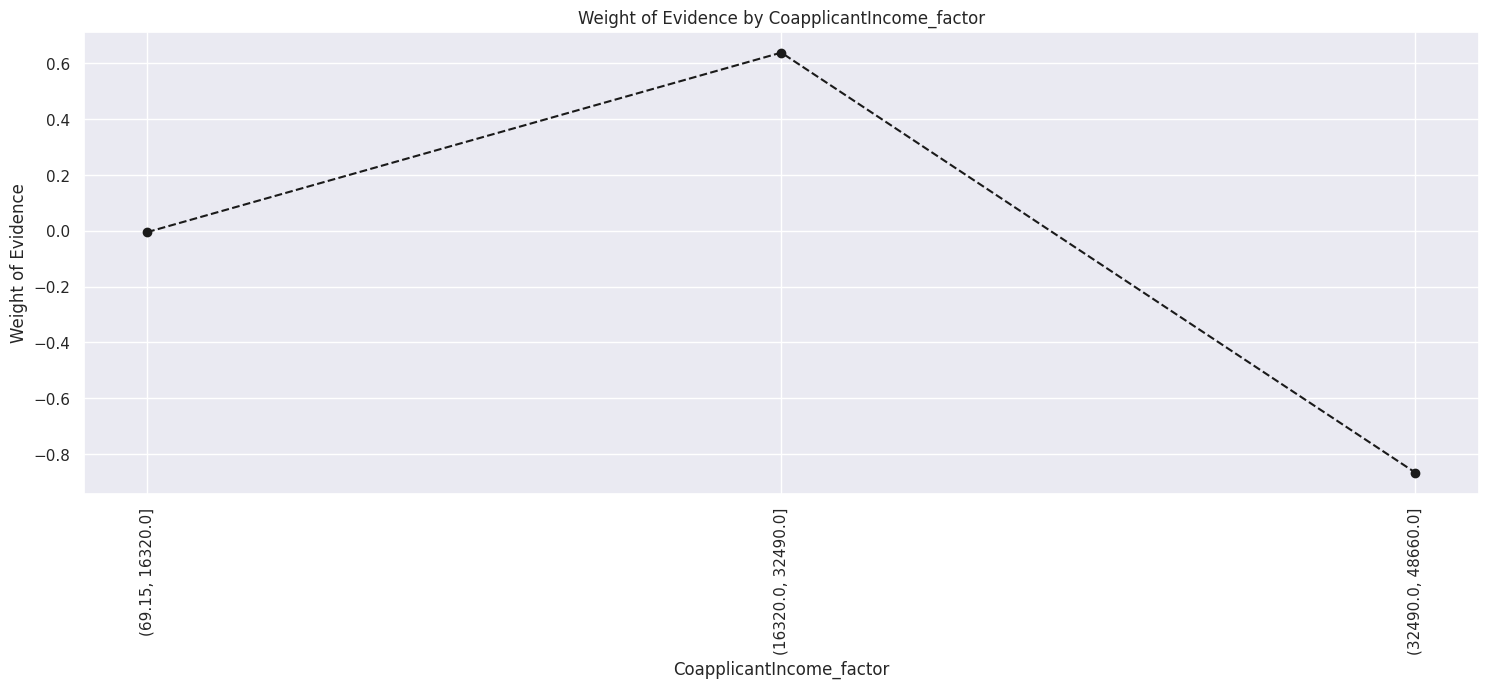

In [105]:

plot_by_woe(df_temp, 90)

In [106]:
df_inputs_prepr['CoapplicantIncome:<6767.4'] = np.where((df_inputs_prepr['CoapplicantIncome'] <= 6767.4), 1, 0)
df_inputs_prepr['CoapplicantIncome:6767.4-13534.8'] = np.where((df_inputs_prepr['CoapplicantIncome'] > 6767.4) & (df_inputs_prepr['CoapplicantIncome'] <= 13534.8), 1, 0)
df_inputs_prepr['CoapplicantIncome:>13534.8'] = np.where((df_inputs_prepr['CoapplicantIncome'] > 13534.8), 1, 0)


In [107]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'CoapplicantIncome:<6767.4', df_targets_prepr)
df_temp

,CoapplicantIncome:<6767.4,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,11,0.727273,0.025641,8.0,3.0,0.02649,0.023622,0.114589,NaN,NaN,0.000337
1,1,418,0.703349,0.974359,294.0,124.0,0.97351,0.976378,-0.002942,0.023923,0.117531,0.000337


In [108]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'CoapplicantIncome:6767.4-13534.8', df_targets_prepr)
df_temp

,CoapplicantIncome:6767.4-13534.8,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,421,0.700713,0.981352,295.0,126.0,0.976821,0.992126,-0.015546,NaN,NaN,0.016762
1,1,8,0.875000,0.018648,7.0,1.0,0.023179,0.007874,1.079670,0.174287,1.095217,0.016762


In [109]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'CoapplicantIncome:>13534.8', df_targets_prepr)
df_temp

,CoapplicantIncome:>13534.8,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,426,0.706573,0.993007,301.0,125.0,0.996689,0.984252,0.012557,NaN,NaN,0.01955
1,1,3,0.333333,0.006993,1.0,2.0,0.003311,0.015748,-1.559387,0.373239,1.571944,0.01955


In [110]:
#3rd variable - LoanAmount
df_inputs_prepr['LoanAmount']
df_inputs_prepr['LoanAmount_factor'] = pd.cut(df_inputs_prepr['LoanAmount'], 50)

In [111]:
#50 bins were not making any sense
df_inputs_prepr['LoanAmount_factor'] = pd.cut(df_inputs_prepr['LoanAmount'], 10)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['LoanAmount_factor'] = pd.cut(df_inputs_prepr['LoanAmount'], 5)

In [112]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'LoanAmount_factor', df_targets_prepr)
df_temp

<ipython-input-91-d10a1eb710e7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
<ipython-input-91-d10a1eb710e7>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,LoanAmount_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(16.317, 153.6]",298,0.711409,0.694639,212.0,86.0,0.701987,0.677165,0.035999,NaN,NaN,inf
1,"(153.6, 290.2]",108,0.685185,0.251748,74.0,34.0,0.245033,0.267717,-0.088535,0.026224,0.124534,inf
2,"(290.2, 426.8]",14,0.642857,0.032634,9.0,5.0,0.029801,0.039370,-0.278453,0.042328,0.189918,inf
3,"(426.8, 563.4]",6,0.666667,0.013986,4.0,2.0,0.013245,0.015748,-0.173093,0.023810,0.105361,inf
4,"(563.4, 700.0]",3,1.000000,0.006993,3.0,0.0,0.009934,0.000000,inf,0.333333,inf,inf


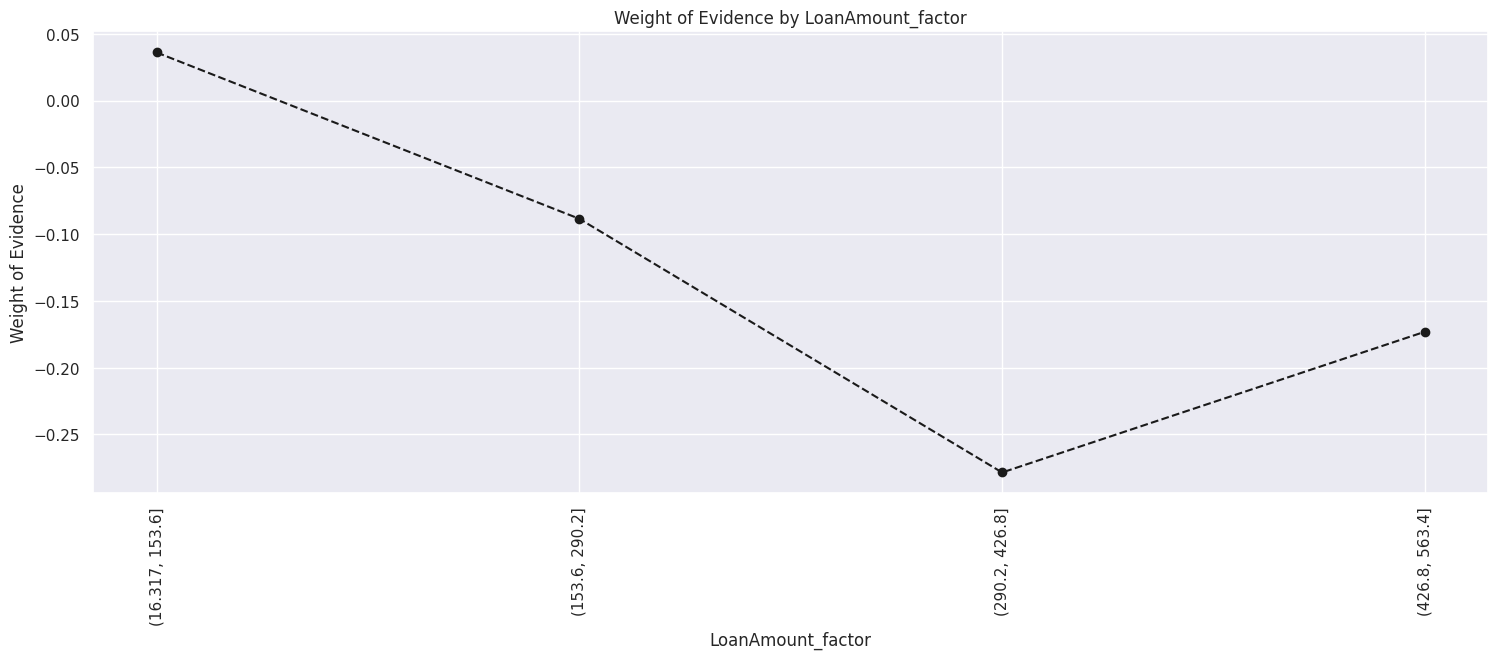

In [113]:
plot_by_woe(df_temp, 90)

In [114]:
df_inputs_prepr['LoanAmount:<290.2'] = np.where((df_inputs_prepr['LoanAmount'] <= 290.2), 1, 0)

df_inputs_prepr['LoanAmount:290.2-426.8'] = np.where((df_inputs_prepr['LoanAmount'] > 290.2) & (df_inputs_prepr['LoanAmount'] <= 426.8), 1, 0)
df_inputs_prepr['LoanAmount:>426.8'] = np.where((df_inputs_prepr['LoanAmount'] > 426.8), 1, 0)

In [115]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'LoanAmount:<290.2', df_targets_prepr)
df_temp

,LoanAmount:<290.2,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,23,0.695652,0.053613,16.0,7.0,0.05298,0.055118,-0.039561,NaN,NaN,0.000089
1,1,406,0.704433,0.946387,286.0,120.0,0.94702,0.944882,0.002260,0.008781,0.041821,0.000089


In [116]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'LoanAmount:290.2-426.8', df_targets_prepr)
df_temp

,LoanAmount:290.2-426.8,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,415,0.706024,0.967366,293.0,122.0,0.970199,0.96063,0.009912,NaN,NaN,0.002759
1,1,14,0.642857,0.032634,9.0,5.0,0.029801,0.03937,-0.278453,0.063167,0.288365,0.002759


In [117]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'LoanAmount:>426.8', df_targets_prepr)
df_temp

,LoanAmount:>426.8,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,420,0.702381,0.979021,295.0,125.0,0.976821,0.984252,-0.007578,NaN,NaN,0.002928
1,1,9,0.777778,0.020979,7.0,2.0,0.023179,0.015748,0.386523,0.075397,0.394101,0.002928


In [118]:
#Final variables on the basis of IV are
#Married:1.0
#Credit_History:1.0
#Location:Semiurban
#Location:Urban
#Loan_Amount_Term:480.0



cols1=[ 'Married:1.0', 'Credit_History:1.0', 'Location:Semiurban', 'Location:Urban', 'Loan_Amount_Term:480.0']

X1=df_inputs_prepr[cols1]

In [119]:
X1

,Married:1.0,Credit_History:1.0,Location:Semiurban,Location:Urban,Loan_Amount_Term:480.0
553,True,False,False,True,False
601,True,True,False,False,False
261,False,True,True,False,False
496,True,True,False,False,False
529,False,True,True,False,False
...,...,...,...,...,...
71,True,True,True,False,False
106,True,True,False,True,False
270,False,True,False,True,False
435,True,True,True,False,False


In [120]:
a =X1.describe()
a

,Married:1.0,Credit_History:1.0,Location:Semiurban,Location:Urban,Loan_Amount_Term:480.0
count,429,429,429,429,429
unique,2,2,2,2,2
top,True,True,False,False,False
freq,268,337,264,285,419


In [121]:
cols1=[ 'Married:1.0', 'Credit_History:1.0', 'Location:Semiurban', 'Location:Urban', 'Loan_Amount_Term:480.0']
cols2=[ 'Married:1.0', 'Credit_History:1.0', 'Location:Urban', 'Loan_Amount_Term:480.0']

In [122]:
X2=df_inputs_prepr[cols2]

In [123]:
#Correlation matrix
corr_matrix = X2.corr()
corr_matrix

,Married:1.0,Credit_History:1.0,Location:Urban,Loan_Amount_Term:480.0
Married:1.0,1.000000,-0.006179,0.051401,-0.135507
Credit_History:1.0,-0.006179,1.000000,-0.085616,-0.107478
Location:Urban,0.051401,-0.085616,1.000000,0.053762
Loan_Amount_Term:480.0,-0.135507,-0.107478,0.053762,1.000000


In [124]:
a =X2.describe()
a

,Married:1.0,Credit_History:1.0,Location:Urban,Loan_Amount_Term:480.0
count,429,429,429,429
unique,2,2,2,2
top,True,True,False,False
freq,268,337,285,419


In [125]:
#Computing VIF
#Imports

import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
#For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.round(1)

,VIF Factor,features
0,0.0,Married:1.0
1,0.0,Credit_History:1.0
2,0.0,Location:Urban
3,0.1,Loan_Amount_Term:480.0


In [127]:
y=df_targets_prepr
y

,target
553,0
601,1
261,1
496,1
529,1
...,...
71,1
106,1
270,1
435,1


In [189]:
#Implementing the model
#module is used

import statsmodels.api as sm

#y.dtypes

logit_model=sm.Logit(y,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.526497
         Iterations 6
                            Results: Logit
Model:                 Logit             Method:            MLE       
Dependent Variable:    target            Pseudo R-squared:  0.133     
Date:                  2024-12-04 16:29  AIC:               459.7345  
No. Observations:      429               BIC:               475.9804  
Df Model:              3                 Log-Likelihood:    -225.87   
Df Residuals:          425               LL-Null:           -260.60   
Converged:             1.0000            LLR p-value:       5.5319e-15
No. Iterations:        6.0000            Scale:             1.0000    
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Married:1.0             0.1548   0.2023  0.7650 0.4443 -0.2418  0.5514
Cre

In [129]:
inputs_train = X2

PD MODEL ESTIMATION

In [130]:
#PD Model Estimation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [131]:
reg = LogisticRegression()

In [132]:
pd.options.display.max_rows = None

In [190]:
reg.fit(X2,y)

In [191]:
reg.intercept_

array([-0.67519913])

In [135]:
reg.coef_

array([[ 0.48863958,  1.8828855 , -0.36311684, -0.80834958]])

In [136]:
feature_name = inputs_train.columns.values

In [137]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.675199
1,Married:1.0,0.488640
2,Credit_History:1.0,1.882885
3,Location:Urban,-0.363117
4,Loan_Amount_Term:480.0,-0.808350


In [138]:
from sklearn import linear_model
import scipy.stats as stat

In [139]:
class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)


        denom = (2.0* (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [140]:
reg = LogisticRegression_with_p_values()

In [194]:
reg.fit(inputs_train, loan_data_targets_train)

In [195]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.861683
1,Married:1.0,0.501503
2,Credit_History:1.0,1.924847


In [143]:
p_values = reg.p_values

In [144]:
p_values = np.append(np.nan, np.array(p_values))

In [145]:
summary_table['p_values'] = p_values
summary_table
summary_table.to_csv('summary_table.csv')

In [146]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.675199,NaN
1,Married:1.0,0.488640,1.454602e-02
2,Credit_History:1.0,1.882885,2.675964e-25
3,Location:Urban,-0.363117,1.170711e-01
4,Loan_Amount_Term:480.0,-0.808350,2.773607e-01


In [147]:
cols3=['Married:1.0','Credit_History:1.0']


In [196]:
X3=df_inputs_prepr[cols3]
inputs_train = X3

In [197]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)
feature_name = inputs_train.columns.values

In [198]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table


,Feature name,Coefficients
0,Intercept,-0.861683
1,Married:1.0,0.501503
2,Credit_History:1.0,1.924847


In [151]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.861683,NaN
1,Married:1.0,0.501503,8.597763e-03
2,Credit_History:1.0,1.924847,4.525810e-29


In [199]:
#Final Model
logit_model=sm.Logit(y,X3)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.540417
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: target           Pseudo R-squared: 0.110     
Date:               2024-12-04 16:31 AIC:              467.6775  
No. Observations:   429              BIC:              475.8004  
Df Model:           1                Log-Likelihood:   -231.84   
Df Residuals:       427              LL-Null:          -260.60   
Converged:          1.0000           LLR p-value:      3.3268e-14
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
Married:1.0          0.0277   0.1919 0.1442 0.8853 -0.3485 0.4038
Credit_History:1.0   1.3765   0.1810 7.6064 0.0000  1.0218 1.7312


In [200]:

df_inputs_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender:1.0,Married:1.0,Dependents:1.0,Dependents:2.0,Dependents:3.0,Education:1.0,Self_Employed:1.0,...,Loan_Amount_Term:36.0,Loan_Amount_Term:60.0,Loan_Amount_Term:84.0,Loan_Amount_Term:120.0,Loan_Amount_Term:180.0,Loan_Amount_Term:240.0,Loan_Amount_Term:300.0,Loan_Amount_Term:342.0,Loan_Amount_Term:360.0,Loan_Amount_Term:480.0
350,9083,0.000000,228.000000,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
377,4310,0.000000,130.000000,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
163,4167,1447.000000,158.000000,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
609,2900,0.000000,71.000000,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
132,2718,0.000000,70.000000,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
578,1782,2232.000000,107.000000,True,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
316,3717,0.000000,120.000000,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,3000,0.000000,66.000000,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False
340,2647,1587.000000,173.000000,True,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
77,1000,3022.000000,110.000000,True,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,True,False


In [201]:
cols3=['Married:1.0','Credit_History:1.0']
X_test=df_inputs_test[cols3]
X_test


,Married:1.0,Credit_History:1.0
350,True,True
377,True,False
163,True,True
609,False,True
132,False,True
578,True,True
316,True,True
2,True,True
340,True,True
77,True,True


In [202]:
loan_data_targets_test.shape
Y_test_data = loan_data_targets_test
Y_test_data

,target
350,1
377,1
163,1
609,1
132,1
578,1
316,1
2,1
340,0
77,0


In [203]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(inputs_train, loan_data_targets_train)

LogisticRegression()

In [204]:
X_test

,Married:1.0,Credit_History:1.0
350,True,True
377,True,False
163,True,True
609,False,True
132,False,True
578,True,True
316,True,True
2,True,True
340,True,True
77,True,True


In [205]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0])

In [158]:
y_pred_logistic = logmodel.decision_function(X_test)
y_pred_logistic

array([ 1.56466685, -0.36018032,  1.56466685,  1.06316432,  1.06316432,
        1.56466685,  1.56466685,  1.56466685,  1.56466685,  1.56466685,
       -0.36018032,  1.56466685,  1.56466685,  1.56466685,  1.56466685,
       -0.36018032,  1.06316432,  1.06316432,  1.56466685,  1.56466685,
        1.56466685,  1.56466685,  1.56466685,  1.56466685,  1.06316432,
        1.06316432,  1.56466685,  1.06316432,  1.06316432,  1.56466685,
        1.56466685,  1.56466685,  1.56466685,  1.06316432,  1.06316432,
       -0.36018032,  1.56466685,  1.56466685,  1.56466685,  1.56466685,
        1.06316432,  1.56466685,  1.56466685,  1.56466685,  1.06316432,
        1.56466685, -0.36018032, -0.36018032, -0.36018032, -0.86168285,
       -0.86168285,  1.06316432, -0.36018032,  1.06316432,  1.56466685,
        1.56466685,  1.06316432,  1.56466685, -0.36018032,  1.56466685,
       -0.36018032, -0.36018032, -0.36018032,  1.56466685,  1.56466685,
        1.06316432,  1.06316432,  1.56466685,  1.56466685,  1.56

In [159]:
from sklearn.metrics import classification_report
classification_report(Y_test_data, predictions)

'              precision    recall  f1-score   support\n\n           0       0.74      0.54      0.62        65\n           1       0.78      0.90      0.84       120\n\n    accuracy                           0.77       185\n   macro avg       0.76      0.72      0.73       185\nweighted avg       0.77      0.77      0.76       185\n'

In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_data, predictions)

array([[ 35,  30],
       [ 12, 108]])

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_data, predictions)

0.772972972972973

In [169]:
from sklearn.metrics import roc_curve, auc

In [170]:
logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test_data, y_pred_logistic)

In [172]:
auc_logistic = auc(logistic_fpr, logistic_tpr)
auc_logistic

0.7458333333333333

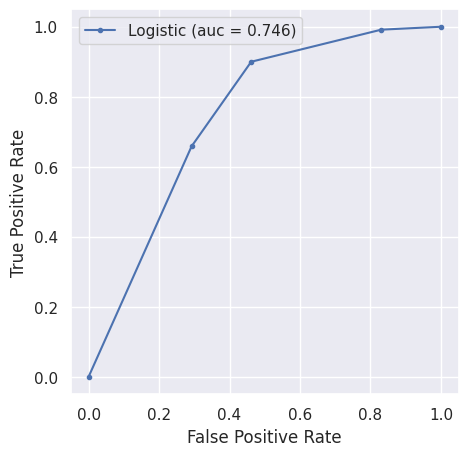

In [174]:
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(logistic_fpr, logistic_tpr, marker = '.', label = 'Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.legend()
plt.show()

DECISION TREE CLASSIFIER


In [207]:
##DECISION-TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X3,y)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [209]:
from sklearn.metrics import accuracy_score

y_pred_dt=dt_model.predict(X_test)
y_prob_dt=dt_model.predict_proba(X_test)[:,1]

# Calculate accuracy

accuracy_dt = accuracy_score(Y_test_data, y_pred_dt)
print("Accuracy for Decision Tree:", accuracy_dt)


Accuracy for Decision Tree: 0.772972972972973


In [212]:
y_pred_dt

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0])

In [217]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual': Y_test_data,
    'Predicted': y_pred_dt
})

print(results_df)


     Actual  Predicted
350       1          1
377       1          0
163       1          1
609       1          1
132       1          1
578       1          1
316       1          1
2         1          1
340       0          1
77        0          1
218       0          0
462       1          1
109       1          1
322       1          1
137       1          1
363       1          0
208       1          1
101       1          1
234       1          1
182       1          1
437       1          1
361       1          1
228       1          1
296       1          1
509       1          1
196       1          1
485       1          1
209       0          1
355       1          1
610       1          1
10        1          1
145       1          1
301       1          1
577       1          1
148       0          1
412       0          0
457       0          1
602       1          1
55        1          1
82        0          1
110       1          1
543       1          1
319       0

In [218]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC

roc_auc_dt = roc_auc_score(Y_test_data, y_pred_dt)
print("ROC-AUC for Decision Tree:", roc_auc_dt)


ROC-AUC for Decision Tree: 0.7192307692307692


In [220]:
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix

cm_dt = confusion_matrix(Y_test_data, y_pred_dt)
print("Confusion Matrix for Decision Tree:\n", cm_dt)


Confusion Matrix for Decision Tree:
 [[ 35  30]
 [ 12 108]]


In [221]:
from sklearn.metrics import classification_report

# Generate Classification Report
report_dt = classification_report(Y_test_data, y_pred_dt)
print("Classification Report for Decision Tree:\n", report_dt)


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.74      0.54      0.62        65
           1       0.78      0.90      0.84       120

    accuracy                           0.77       185
   macro avg       0.76      0.72      0.73       185
weighted avg       0.77      0.77      0.76       185



RANDOM FOREST


In [222]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X3,y)

# Predictions and probabilities
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [223]:

# Calculate accuracy

accuracy_rf= accuracy_score(Y_test_data, y_pred_rf)
print("Accuracy for Decision Tree:", accuracy_rf)

Accuracy for Decision Tree: 0.772972972972973


In [224]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine (SVM)': SVC(kernel='linear', random_state=42)
}

# Dictionary to store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X3,y)

    # Make predictions
    y_pred_final = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test_data, y_pred_final)

    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy
    })

    # Optional: Print confusion matrix and classification report
    print(f"Model: {model_name}")
    print("Confusion Matrix:\n", confusion_matrix(Y_test_data, y_pred_final))
    print("Classification Report:\n", classification_report(Y_test_data, y_pred_final))
    print("\n" + "-" * 50 + "\n")

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
print("Summary of Model Accuracies:")
print(results_df)

# Save the results to a CSV file if needed
results_df.to_csv('model_accuracies.csv', index=False)


Model: Logistic Regression
Confusion Matrix:
 [[ 35  30]
 [ 12 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.54      0.62        65
           1       0.78      0.90      0.84       120

    accuracy                           0.77       185
   macro avg       0.76      0.72      0.73       185
weighted avg       0.77      0.77      0.76       185


--------------------------------------------------

Model: Decision Tree
Confusion Matrix:
 [[ 35  30]
 [ 12 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.54      0.62        65
           1       0.78      0.90      0.84       120

    accuracy                           0.77       185
   macro avg       0.76      0.72      0.73       185
weighted avg       0.77      0.77      0.76       185


--------------------------------------------------

Model: Random Forest
Confusion Matrix:
 [[ 35  30]
 [ 12 108